In [27]:
import pandas as pd
import numpy as np

from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
columns = ['id','country','Label','Text']
df = pd.read_csv('twitter.csv',names=columns)
print(df.shape)
df.head(7)

(74682, 4)


,id,country,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       74682 non-null  int64 
 1   country  74682 non-null  object
 2   Label    74682 non-null  object
 3   Text     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [30]:
df['Label'].value_counts()

Label
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [31]:
df.isna().sum()

id           0
country      0
Label        0
Text       686
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

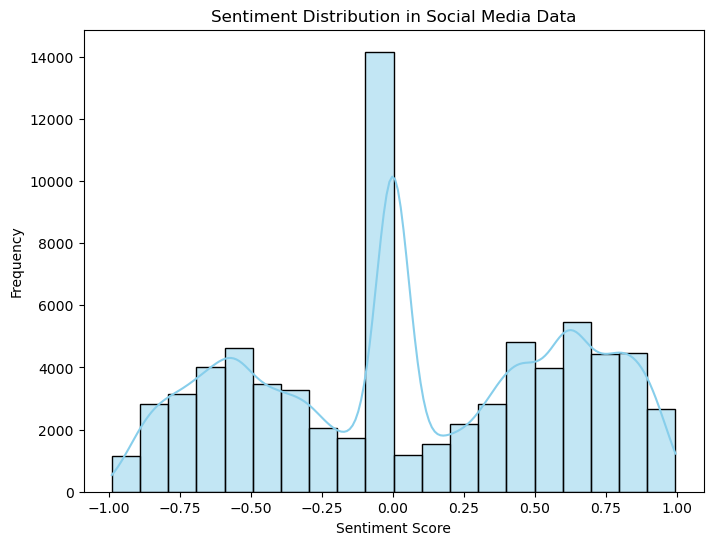

In [34]:
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution in Social Media Data')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

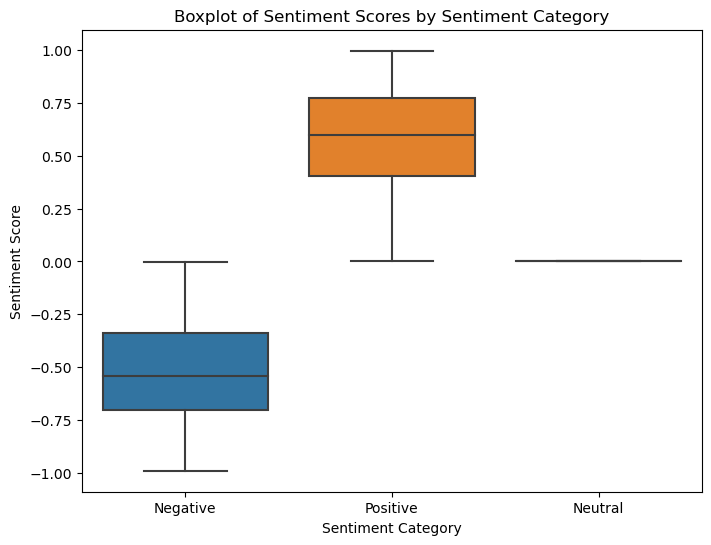

In [35]:
# Categorize sentiment scores into positive, neutral, and negative
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_category', y='sentiment_score', data=df)
plt.title('Boxplot of Sentiment Scores by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()

In [36]:
pip install wordcloud

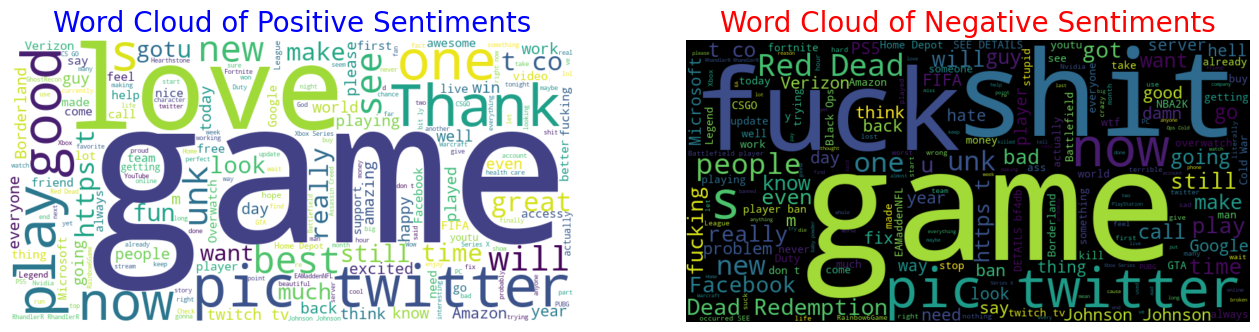

In [37]:
from wordcloud import WordCloud

# Separate positive and negative sentiment posts
positive_text = ' '.join(df[df['sentiment_score'] > 0]['Text'])
negative_text = ' '.join(df[df['sentiment_score'] < 0]['Text'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiments', fontdict={'fontsize': 20, 'color': 'blue'})
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiments', fontdict={'fontsize': 20, 'color': 'red'})
plt.axis('off')

plt.show()